In [36]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [34]:
# Convert Timestamp to date for grouping
data['Day'] = data['Timestamp'].dt.date

# Specify only numeric columns for the mean calculation
# Assuming your dataframe has numeric columns you want to average
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Day and calculate mean only for numeric columns
day_average = data.groupby(['Day'])[numeric_columns].mean()

# Display the result
list(day_average.index)

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 27),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4)

In [52]:
# Convert Timestamp to date for grouping
data['Day'] = data['Timestamp'].dt.date

# Specify only numeric columns for the mean calculation
# Assuming your dataframe has numeric columns you want to average
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Day and calculate mean only for numeric columns
day_average = data.groupby(['Day'])[numeric_columns].mean()

# Display the result
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


In [58]:
# Convert Timestamp to date for grouping
data['Day'] = data['Timestamp'].dt.date

# Specify only numeric columns for the mean calculation
# Assuming your dataframe has numeric columns you want to average
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Day and calculate mean only for numeric columns
day_average = data.groupby(['Day']).count()[numeric_columns]

# Display the result
day_average.head()

,Rating
Day,
2018-01-01,46
2018-01-02,57
2018-01-03,43
2018-01-04,48
2018-01-05,52


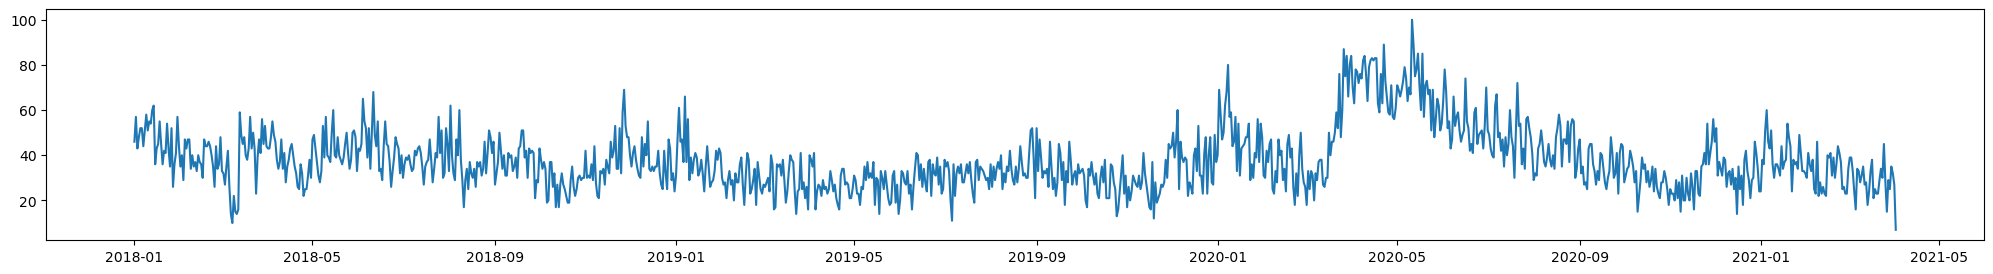

In [60]:
# Display the plot
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

In [42]:
day_average['Rating'].min()

3.7916666666666665

### Average rating by week

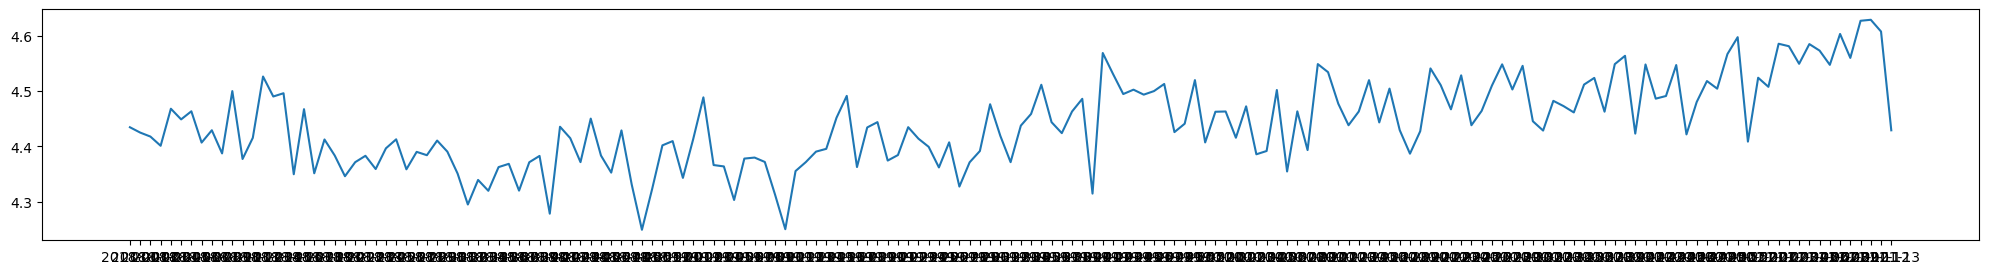

In [84]:
# Convert Timestamp to date for grouping
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')

# Only select numeric columns for the mean calculation
# Assuming 'Rating' is a numeric column
numeric_cols = ['Rating']  # Add other numeric columns if needed
week_average = data.groupby(['Week'])[numeric_cols].mean()

# Plot the results
plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])

### Average rating by month

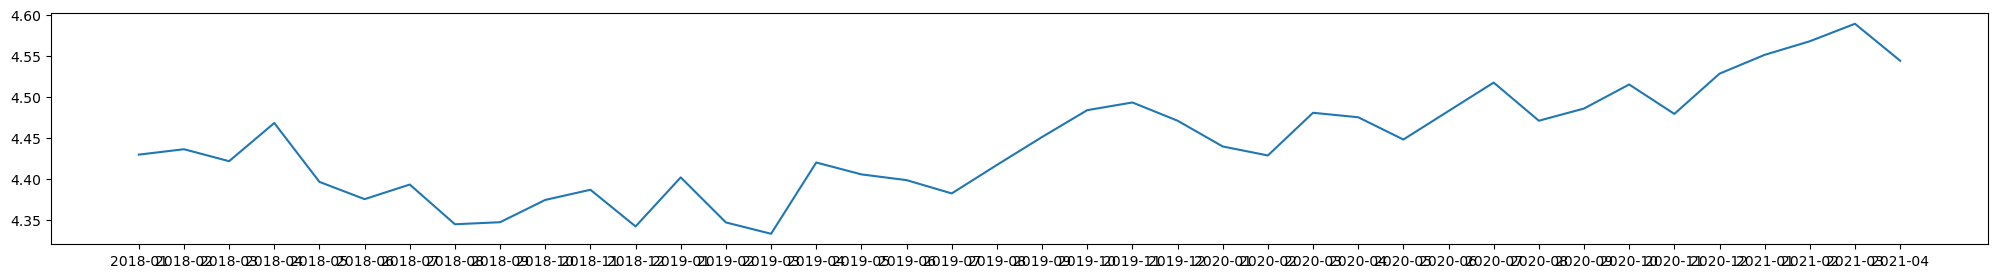

In [88]:
# Convert Timestamp to date for grouping
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')

# Only select numeric columns for the mean calculation
# Assuming 'Rating' is a numeric column
numeric_cols = ['Rating']  # Add other numeric columns if needed
month_average = data.groupby(['Month'])[numeric_cols].mean()

# Plot the results
plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average['Rating'])

In [93]:
month_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


### Average rating by month by course

In [105]:
# Convert Timestamp to date for grouping
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
numeric_cols = ['Rating']  # Add other numeric columns if needed
month_average_crs = data.groupby(['Month', 'Course Name'])[numeric_cols].mean().unstack()
month_average_crs[:20]

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11                                                    NaN          
2018-12                                                    NaN          
2019-01                                                    NaN          
2019-02                                                    NaN          
2019-03                                                    NaN          
2019-04                                                    NaN          
2019-05                                                    NaN          
2019-06                                               4.722222          
2019-07                                               4.427273          
2019-08                                               4.416667          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   
2018-06                        4.631579   
2018-07                        4.159091   
2018-08                        4.411765   
2018-09                        4.173913   
2018-10                        4.464286   
2018-11                        4.462963   
2018-12                        3.985294   
2019-01                        4.033333   
2019-02                        4.3000

<Axes: xlabel='Month'>

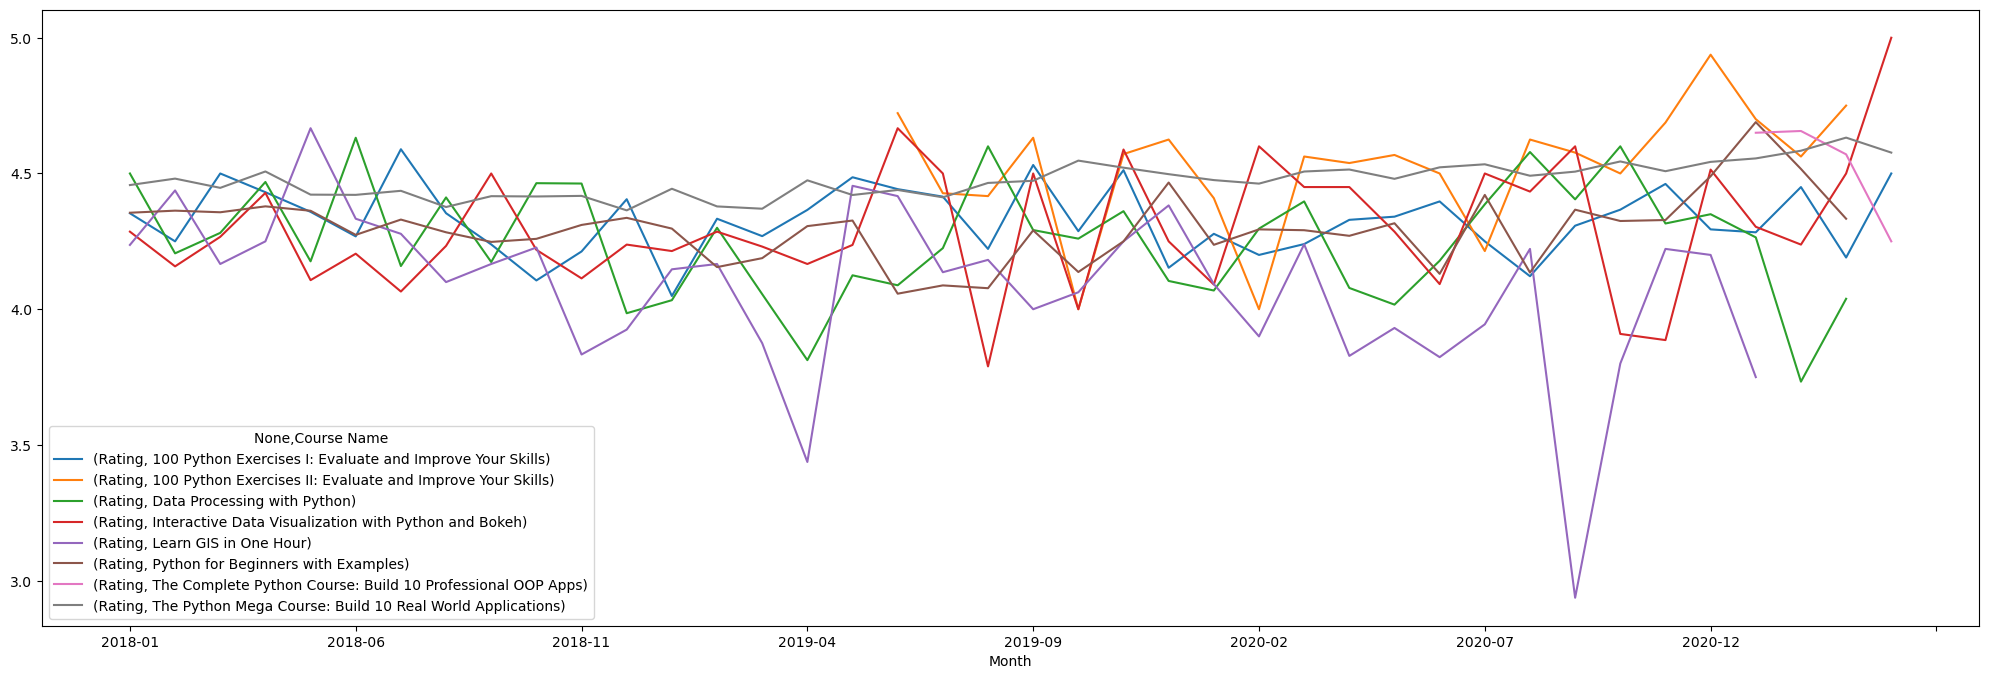

In [107]:
# Convert Timestamp to date for grouping
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
numeric_cols = ['Rating']  # Add other numeric columns if needed
month_average_crs = data.groupby(['Month', 'Course Name'])[numeric_cols].mean().unstack()

month_average_crs.plot(figsize=(25, 8))

<Axes: xlabel='Month'>

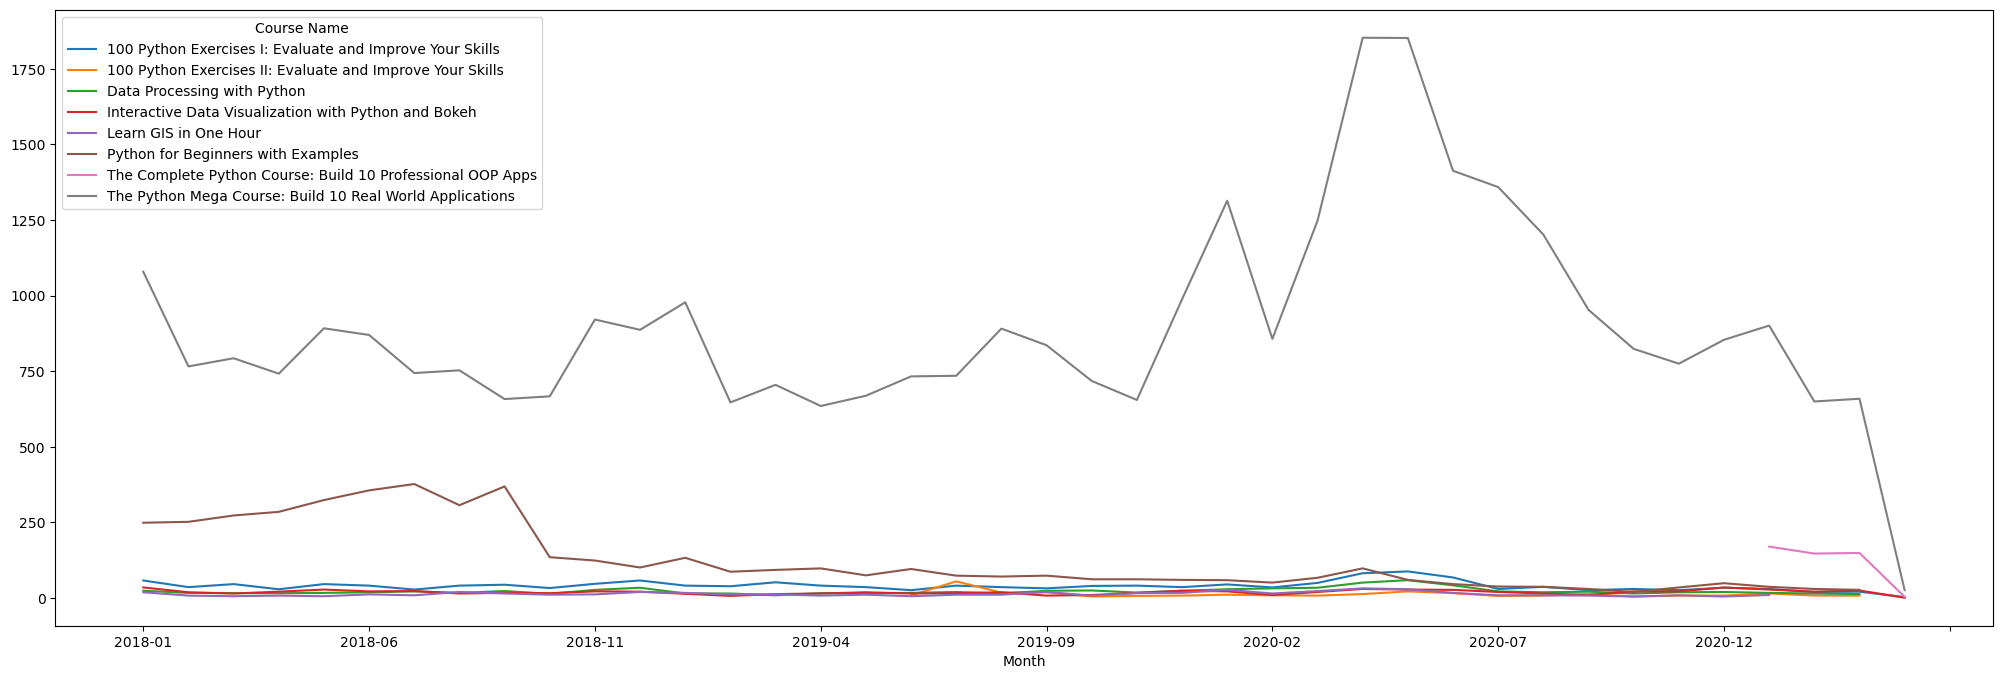

In [122]:
# Convert Timestamp to date for grouping
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize=(25, 8))

In [111]:
month_average_crs

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                                   58.0         
2018-02                                                   36.0         
2018-03                                                   46.0         
2018-04                                                   29.0         
2018-05                                                   46.0         
2018-06                                                   41.0         
2018-07                                                   28.0         
2018-08                                                   41.0         
2018-09                                                   44.0         
2018-10                                                   33.0         
2018-11                                                   47.0         
2018-12                                                   58.0         
2019-01                                                   41.0         
2019-02                                                   39.0         
2019-03                                                   52.0         
2019-04                                                   41.0         
2019-05                                                   36.0         
2019-06                                                   26.0         
2019-07                                                   41.0         
2019-08                                                   36.0         
2019-09                                                   32.0         
2019-10                                                   40.0         
2019-11                                                   41.0         
2019-12                                                   36.0         
2020-01                                                   45.0         
2020-02                                                   35.0         
2020-03                                                   50.0         
2020-04                                                   82.0         
2020-05                                                   88.0         
2020-06                                                   68.0         
2020-07                                                   30.0         
2020-08                                                   37.0         
2020-09                                                   26.0         
2020-10                                                   30.0         
2020-11                                                   26.0         
2020-12                                                   34.0         
2021-01                                                   30.0         
2021-02                                                   20.0         
2021-03                                                   21.0         
2021-04                                                    3.0         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

### What day are people the happiest?

In [128]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday'])['Rating'].mean()
weekday_average

Weekday
Friday       4.455207
Monday       4.449335
Saturday     4.440274
Sunday       4.439097
Thursday     4.437880
Tuesday      4.446240
Wednesday    4.427452
Name: Rating, dtype: float64

In [166]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber'])['Rating'].mean()
# Fix: Use level parameter instead of positional argument for sorting a Series with MultiIndex
weekday_average = weekday_average.sort_values(level='Daynumber')  # or level=1

# weekday_average is already a Series with the mean values
# No need to access a 'Rating' column from it
plt.figure(figsize=[23, 5])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

TypeError: Series.sort_values() got an unexpected keyword argument 'level'

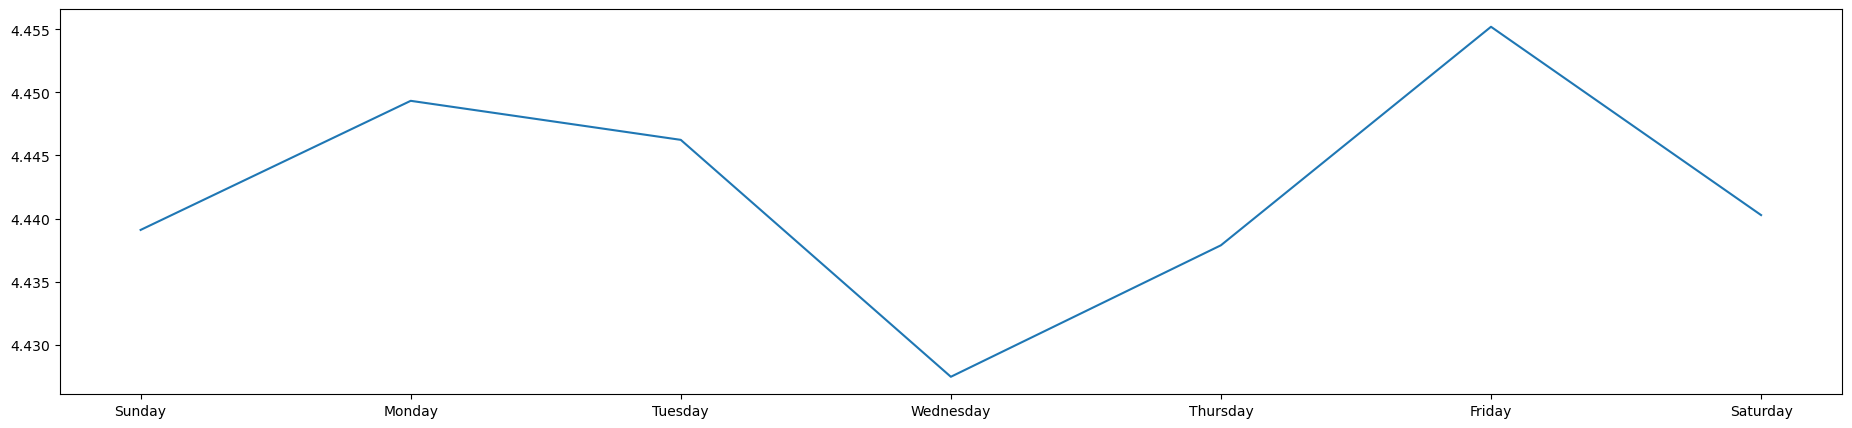

In [168]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber'])['Rating'].mean()
# Fix: For Series with MultiIndex, we need to reset_index, sort, and set_index again
# Or use sort_index with level parameter instead of sort_values
weekday_average = weekday_average.sort_index(level='Daynumber')  # sort by the Daynumber level

plt.figure(figsize=[23, 5])
# Fix: weekday_average is already the values we want to plot, not a DataFrame with a 'Rating' column
plt.plot(weekday_average.index.get_level_values(0), weekday_average)